# Linear Regression and Polynomial Regression
This notebook demonstrates:
1. **Simple Linear Regression** and **Multiple Linear Regression** using the California Housing Dataset.
2. **Polynomial Regression** using synthetic data.

## First Program: Linear Regression and Multiple Linear Regression

Simple LR R² Score: 0.46


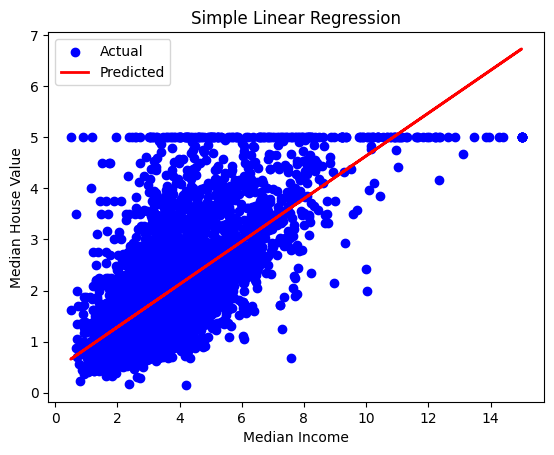

Multiple LR R² Score: 0.46


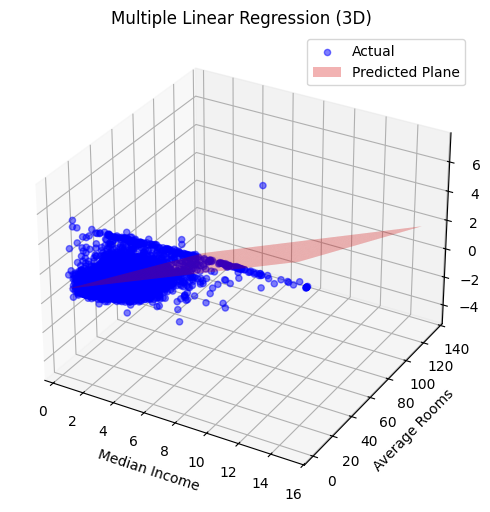

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D

# Load the California housing dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# Simple Linear Regression (1 feature)
X_single = data[['MedInc']]  # Median income
y_single = data['MedHouseVal']  # Median house value

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

# Train the model
lr_single = LinearRegression()
lr_single.fit(X_train, y_train)

# Predict and evaluate
y_pred_single = lr_single.predict(X_test)
print(f"Simple LR R² Score: {r2_score(y_test, y_pred_single):.2f}")

# Plot results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_single, color='red', linewidth=2, label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Multiple Linear Regression (2 features)
X_multi = data[['MedInc', 'AveRooms']]  # Median income and average rooms
y_multi = data['MedHouseVal']

# Split data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Train the model
lr_multi = LinearRegression()
lr_multi.fit(X_train_multi, y_train_multi)

# Predict and evaluate
y_pred_multi = lr_multi.predict(X_test_multi)
print(f"Multiple LR R² Score: {r2_score(y_test_multi, y_pred_multi):.2f}")

# 3D Visualization
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of test data
ax.scatter(
    X_test_multi['MedInc'],
    X_test_multi['AveRooms'],
    y_test_multi,
    c='blue',
    marker='o',
    alpha=0.5,
    label='Actual'
)

# Create meshgrid for regression plane
x1 = np.linspace(X_test_multi['MedInc'].min(), X_test_multi['MedInc'].max(), 100)
x2 = np.linspace(X_test_multi['AveRooms'].min(), X_test_multi['AveRooms'].max(), 100)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)

# Predict values for the meshgrid
z = lr_multi.intercept_ + lr_multi.coef_[0] * x1_mesh + lr_multi.coef_[1] * x2_mesh

# Plot regression plane
ax.plot_surface(x1_mesh, x2_mesh, z, color='red', alpha=0.3, label='Predicted Plane')
ax.set_xlabel('Median Income')
ax.set_ylabel('Average Rooms')
ax.set_zlabel('Median House Value')
plt.title('Multiple Linear Regression (3D)')
plt.legend()
plt.show()

## Second Program: Polynomial Regression

Polynomial Regression R² Score: 0.98


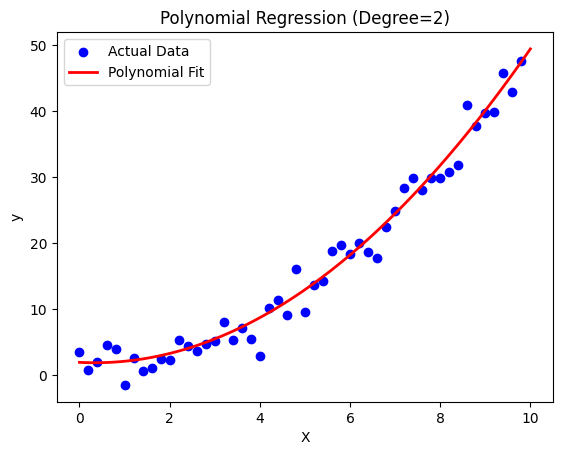

In [23]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Generate synthetic polynomial data
np.random.seed(0)
X = np.arange(0, 10, 0.2)
y = 0.5 * X**2 + np.random.normal(0, 2, len(X))  # Quadratic relationship with noise
X = X.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features to polynomial (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train polynomial regression model
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)

# Predict and evaluate
y_pred_poly = lr_poly.predict(X_poly_test)
print(f"Polynomial Regression R² Score: {r2_score(y_test, y_pred_poly):.2f}")

# Plot results
plt.scatter(X, y, color='blue', label='Actual Data')
x_plot = np.linspace(0, 10, 100).reshape(-1, 1)
x_plot_poly = poly.transform(x_plot)
y_plot = lr_poly.predict(x_plot_poly)
plt.plot(x_plot, y_plot, color='red', linewidth=2, label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree=2)')
plt.legend()
plt.show()